# Reading in, cleaning and transforming data

In [1]:
# reading in our data, looks like we only have 112K trips this month yeah that seems to be true
import pandas as pd
import numpy as np
import datetime as dt

data = pd.read_csv('data/202308-citibike-tripdata.csv')

data.head()

data.shape


C:\Users\micha\AppData\Local\Temp\ipykernel_16352\488572048.py:6: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/202308-citibike-tripdata.csv')


(4093169, 13)

In [2]:
#  we start of with 4 million so lets see how many have nan of those less than 10K have nan somewhere  
# we are spereating them out for possible anyalis latere and tossing them for the moment 

bad_data = data[data.isna().any(axis=1)]

bad_data 

data = data.dropna()


In [3]:
# search them otherwise.. probably not hard but I don't know how to do it. I think I know how to do it 
# know but at first I did not
day = pd.to_datetime(data.started_at).dt.day
hour = pd.to_datetime(data.started_at).dt.hour
day_week = pd.to_datetime(data.started_at).dt.dayofweek

data
# print(day)
# print(hour)
# print(day_week)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C5E94016E7939757,classic_bike,2023-08-29 21:15:27,2023-08-29 21:51:04,Lexington Ave & E 36 St,6313.10,Amsterdam Ave & W 125 St,7800.03,40.747574,-73.978801,40.813358,-73.956461,member
1,E88D94798ABBBD7C,classic_bike,2023-08-06 19:03:35,2023-08-06 19:04:56,Rockaway Ave & Bainbridge St,4285.09,MacDougal St & Rockaway Ave,4212.01,40.683236,-73.911943,40.680180,-73.911360,member
2,341D3CE4743A92EC,classic_bike,2023-08-02 20:34:04,2023-08-02 20:40:19,W 13 St & 5 Ave,5947.04,E 10 St & 2 Ave,5746.02,40.735445,-73.994310,40.729708,-73.986598,member
3,21C763DECA96FD02,classic_bike,2023-08-14 13:47:23,2023-08-14 14:17:36,Central Park North & Adam Clayton Powell Blvd,7617.07,5 Ave & E 29 St,6248.06,40.799484,-73.955613,40.745168,-73.986831,member
4,A8533C28598A6AB8,classic_bike,2023-08-03 13:05:09,2023-08-03 13:52:27,W 13 St & 5 Ave,5947.04,Amsterdam Ave & W 125 St,7800.03,40.735445,-73.994310,40.813358,-73.956461,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4093164,1DF107B2D3236068,classic_bike,2023-08-01 17:08:26,2023-08-01 17:17:22,W 17 St & 8 Ave,6148.02,Gramercy Park N & Gramercy Park E,6013.12,40.741776,-74.001497,40.737950,-73.985090,member
4093165,168B289864D8DE47,classic_bike,2023-08-27 17:06:25,2023-08-27 17:23:47,W 17 St & 8 Ave,6148.02,W 47 St & 10 Ave,6824.07,40.741776,-74.001497,40.762699,-73.993012,member
4093166,18FC63FE8411C4B1,classic_bike,2023-08-24 08:22:50,2023-08-24 08:32:43,Bergen St & Vanderbilt Ave,4157.10,Kingston Ave & Herkimer St,4205.06,40.679461,-73.967905,40.678907,-73.941428,member
4093167,8806D0CDD899C339,classic_bike,2023-08-06 13:33:22,2023-08-06 13:38:43,Adam Clayton Powell Blvd & W 123 St,7704.04,Lenox Ave & W 133 St,7790.04,40.807832,-73.949373,40.812960,-73.941878,member


In [4]:
# adding the new columns back
data.insert(2, "day", day, True)
data.insert(3, "hour", hour, True)
data.insert(3, "day_of_week", day_week, True)

data

,ride_id,rideable_type,day,day_of_week,hour,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C5E94016E7939757,classic_bike,29,1,21,2023-08-29 21:15:27,2023-08-29 21:51:04,Lexington Ave & E 36 St,6313.10,Amsterdam Ave & W 125 St,7800.03,40.747574,-73.978801,40.813358,-73.956461,member
1,E88D94798ABBBD7C,classic_bike,6,6,19,2023-08-06 19:03:35,2023-08-06 19:04:56,Rockaway Ave & Bainbridge St,4285.09,MacDougal St & Rockaway Ave,4212.01,40.683236,-73.911943,40.680180,-73.911360,member
2,341D3CE4743A92EC,classic_bike,2,2,20,2023-08-02 20:34:04,2023-08-02 20:40:19,W 13 St & 5 Ave,5947.04,E 10 St & 2 Ave,5746.02,40.735445,-73.994310,40.729708,-73.986598,member
3,21C763DECA96FD02,classic_bike,14,0,13,2023-08-14 13:47:23,2023-08-14 14:17:36,Central Park North & Adam Clayton Powell Blvd,7617.07,5 Ave & E 29 St,6248.06,40.799484,-73.955613,40.745168,-73.986831,member
4,A8533C28598A6AB8,classic_bike,3,3,13,2023-08-03 13:05:09,2023-08-03 13:52:27,W 13 St & 5 Ave,5947.04,Amsterdam Ave & W 125 St,7800.03,40.735445,-73.994310,40.813358,-73.956461,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4093164,1DF107B2D3236068,classic_bike,1,1,17,2023-08-01 17:08:26,2023-08-01 17:17:22,W 17 St & 8 Ave,6148.02,Gramercy Park N & Gramercy Park E,6013.12,40.741776,-74.001497,40.737950,-73.985090,member
4093165,168B289864D8DE47,classic_bike,27,6,17,2023-08-27 17:06:25,2023-08-27 17:23:47,W 17 St & 8 Ave,6148.02,W 47 St & 10 Ave,6824.07,40.741776,-74.001497,40.762699,-73.993012,member
4093166,18FC63FE8411C4B1,classic_bike,24,3,8,2023-08-24 08:22:50,2023-08-24 08:32:43,Bergen St & Vanderbilt Ave,4157.10,Kingston Ave & Herkimer St,4205.06,40.679461,-73.967905,40.678907,-73.941428,member
4093167,8806D0CDD899C339,classic_bike,6,6,13,2023-08-06 13:33:22,2023-08-06 13:38:43,Adam Clayton Powell Blvd & W 123 St,7704.04,Lenox Ave & W 133 St,7790.04,40.807832,-73.949373,40.812960,-73.941878,member


In [5]:
# ohh yeah durations would be useful!, I am searching for trips that probably did not happen 
import geopy.distance


trip_duration = (pd.to_datetime(data.ended_at) - pd.to_datetime(data.started_at))
# print(trip_duration)

# this is used to make the animated map  
change_in_lng = data['end_lng'] - data['start_lng']
change_in_lat = data['end_lat'] - data['start_lat']
# print(change_in_lng)
# print(change_in_lat)

# now we have distance between start and end, not total ride just start and end 
distance = data.apply(lambda x: geopy.distance.geodesic((x.start_lat, x.start_lng), (x.end_lat, x.end_lng)).mi, axis=1)

# distance


In [6]:
distance.describe()

count    4.083172e+06
mean     1.228217e+00
std      1.165246e+00
min      0.000000e+00
25%      4.590748e-01
50%      8.871873e-01
75%      1.623762e+00
max      1.721649e+01
dtype: float64

In [7]:
# adding these as columns back to data

data.insert(15, "change_in_lat", change_in_lat, True)
data.insert(16, "change_in_lng", change_in_lng, True)
data.insert(17, "distance", distance, True)
data.insert(18, "trip_duration", trip_duration, True)


data.describe()

,day,day_of_week,hour,start_lat,start_lng,end_lat,end_lng,change_in_lat,change_in_lng,distance,trip_duration
count,4.083172e+06,4.083172e+06,4.083172e+06,4.083172e+06,4.083172e+06,4.083172e+06,4.083172e+06,4.083172e+06,4.083172e+06,4.083172e+06,4083172
mean,1.584032e+01,2.895848e+00,1.430747e+01,4.074066e+01,-7.397193e+01,4.074041e+01,-7.397193e+01,-2.566715e-04,-6.399687e-06,1.228217e+00,0 days 00:14:25.671761316
std,9.045824e+00,1.919424e+00,5.132317e+00,4.192855e-02,2.849436e-02,4.194958e-02,2.855145e-02,2.025825e-02,1.819438e-02,1.165246e+00,0 days 00:26:46.691811435
min,1.000000e+00,0.000000e+00,0.000000e+00,4.063126e+01,-7.402805e+01,4.063338e+01,-7.408364e+01,-2.319355e-01,-1.416231e-01,0.000000e+00,-1 days +23:36:57
25%,8.000000e+00,1.000000e+00,1.100000e+01,4.071464e+01,-7.399250e+01,4.071427e+01,-7.399257e+01,-8.446932e-03,-8.415000e-03,4.590748e-01,0 days 00:05:13
50%,1.600000e+01,3.000000e+00,1.500000e+01,4.073936e+01,-7.397950e+01,4.073902e+01,-7.397950e+01,0.000000e+00,0.000000e+00,8.871873e-01,0 days 00:09:39
75%,2.300000e+01,5.000000e+00,1.800000e+01,4.076353e+01,-7.395467e+01,4.076341e+01,-7.395451e+01,8.010770e-03,8.333675e-03,1.623762e+00,0 days 00:17:30
max,3.100000e+01,6.000000e+00,2.300000e+01,4.089416e+01,-7.384944e+01,4.088226e+01,-7.385915e+01,2.073420e-01,1.543468e-01,1.721649e+01,1 days 00:59:34


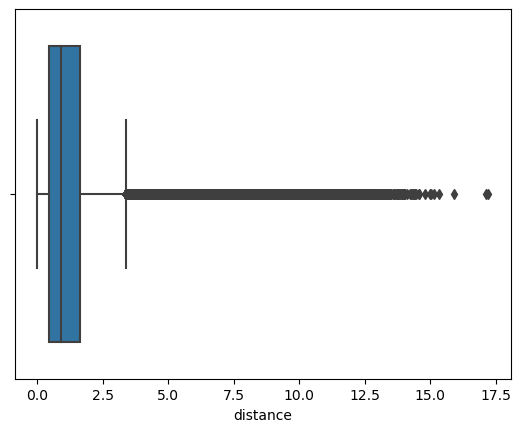

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=data["distance"])

plt.show()

# Deleting outliers

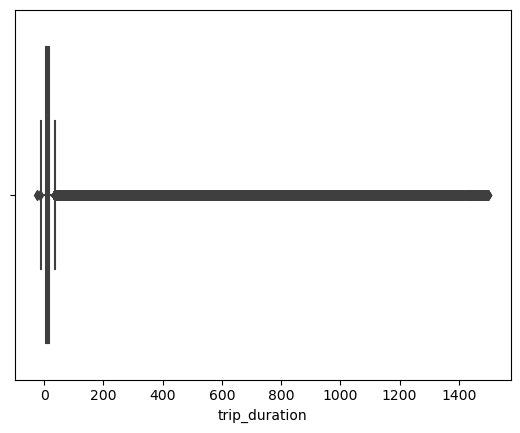

In [9]:
# # can I get the sverage time and standard deviation for the durration??

import matplotlib.pyplot as plt
import seaborn as sns

time = data['trip_duration']/pd.Timedelta(minutes=1)

# 65k rides over 1 hour, I am sure there is valuable information here but they are all outliers  

time = time.to_frame(name="trip_duration")

sns.boxplot(x=time["trip_duration"])

plt.show()

data['trip_duration'].describe()

time[time >120].count()

long_trips = data.loc[(data['trip_duration']/pd.Timedelta(minutes=1) > 60)]

long_trips

data = data.loc[(data['trip_duration']/pd.Timedelta(minutes=1) <= 60)]

count                      4017775
mean     0 days 00:12:39.417400924
std      0 days 00:10:36.913846576
min              -1 days +23:36:57
25%                0 days 00:05:10
50%                0 days 00:09:28
75%                0 days 00:16:56
max                0 days 01:00:00
Name: trip_duration, dtype: object

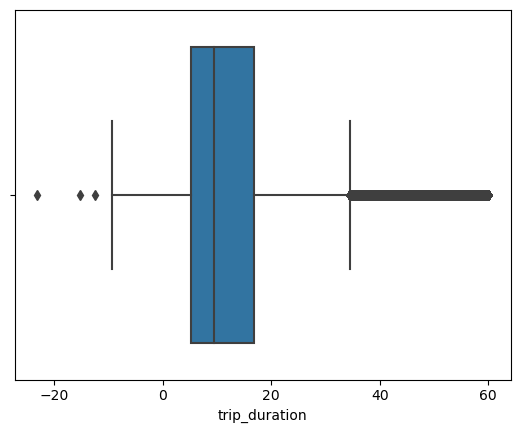

In [11]:
# so we see the average ride is pretty short peaking out at less than 20 minutes
# and we could have actually chopped off more rides but this is still much more managable 
time = data['trip_duration']/pd.Timedelta(minutes=1)


time = time.to_frame(name="trip_duration")

sns.boxplot(x=time["trip_duration"])


plt.show()

In [12]:
# 44 negative trips these are just wrong should be checked
neg_trips = data.loc[(data['trip_duration']/pd.Timedelta(minutes=1) < 0)]

neg_trips.count()

data = data.loc[(data['trip_duration']/pd.Timedelta(minutes=1) > 0)]

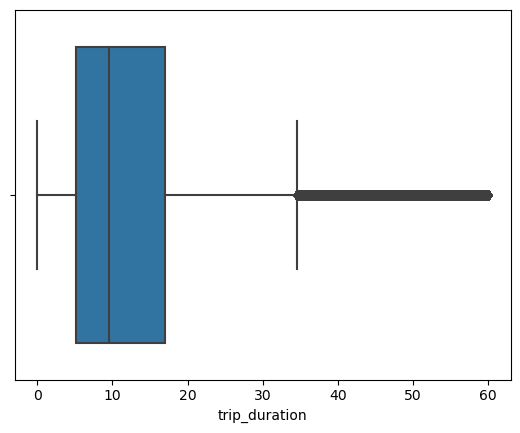

In [13]:
time = data['trip_duration']/pd.Timedelta(minutes=1)


time = time.to_frame(name="trip_duration")

sns.boxplot(x=time["trip_duration"])


plt.show()

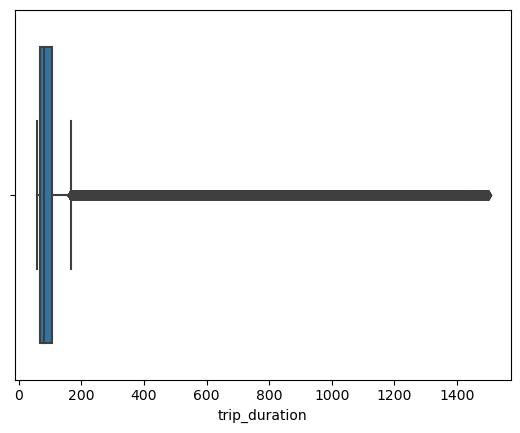

In [14]:
time = long_trips['trip_duration']/pd.Timedelta(minutes=1)


time = time.to_frame(name="trip_duration")

sns.boxplot(x=time["trip_duration"])


plt.show()

In [15]:
data.describe()

,day,day_of_week,hour,start_lat,start_lng,end_lat,end_lng,change_in_lat,change_in_lng,distance,trip_duration
count,4.015883e+06,4.015883e+06,4.015883e+06,4.015883e+06,4.015883e+06,4.015883e+06,4.015883e+06,4.015883e+06,4.015883e+06,4.015883e+06,4015883
mean,1.584590e+01,2.884853e+00,1.430675e+01,4.074049e+01,-7.397194e+01,4.074024e+01,-7.397196e+01,-2.430849e-04,-1.105719e-05,1.215484e+00,0 days 00:12:39.776149354
std,9.052917e+00,1.916205e+00,5.138991e+00,4.182252e-02,2.847669e-02,4.181874e-02,2.851896e-02,1.977935e-02,1.801801e-02,1.131375e+00,0 days 00:10:36.848615506
min,1.000000e+00,0.000000e+00,0.000000e+00,4.063126e+01,-7.402805e+01,4.063338e+01,-7.408364e+01,-2.319355e-01,-1.406766e-01,0.000000e+00,0 days 00:00:01
25%,8.000000e+00,1.000000e+00,1.100000e+01,4.071450e+01,-7.399253e+01,4.071427e+01,-7.399257e+01,-8.424000e-03,-8.415000e-03,4.616200e-01,0 days 00:05:10
50%,1.600000e+01,3.000000e+00,1.500000e+01,4.073925e+01,-7.397951e+01,4.073902e+01,-7.397964e+01,0.000000e+00,0.000000e+00,8.859233e-01,0 days 00:09:29
75%,2.300000e+01,5.000000e+00,1.800000e+01,4.076342e+01,-7.395468e+01,4.076336e+01,-7.395469e+01,8.004204e-03,8.329760e-03,1.612098e+00,0 days 00:16:56
max,3.100000e+01,6.000000e+00,2.300000e+01,4.089416e+01,-7.384944e+01,4.088226e+01,-7.385915e+01,1.891939e-01,1.396530e-01,1.721649e+01,0 days 01:00:00


# Rides less than two minuters and same station - probably will include as a suplimental map 

In [16]:
# 260K that are less than 2 minutes
less_2_min = data.loc[data['trip_duration'] < pd.Timedelta("0 days 00:02:00")]

# less_2_min                      
                  
# greater_5 = df2.loc[(df2['end_station_name'] > 2)&(df2['trip_duration'] > pd.Timedelta("0 days 00:05:00"))].sort_values(by=['end_station_name'])


In [17]:
# removing that data from data so now data has thiose that look like broken rides removed 

# data.loc[(data['trip_duration'] < pd.Timedelta("0 days 00:02:00")) & (data['start_station_name'] != 
#                 data['end_station_name']) | (data['trip_duration'] => pd.Timedelta("0 days 00:02:00") ]


data = data.loc[((data['trip_duration'] < pd.Timedelta("0 days 00:02:00")) & (data['start_station_name'] != data['end_station_name'])) | (data['trip_duration'] >= pd.Timedelta("0 days 00:02:00")) ]


In [18]:
# 130 k rides less then 2 minutes start and stop at the same station
less_2_min_same_satation = less_2_min.loc[less_2_min['start_station_name'] == less_2_min['end_station_name']]

# some quick stats
# almost 2 min, was someone really riding 
# print(less_2_min_same_satation['trip_duration'].max())
# print(less_2_min_same_satation['trip_duration'].mean())
# not sure what to make of this 
# print(less_2_min_same_satation['trip_duration'].min())

# less_2_min_same_satation.describe()

# Formating the Broken bikes

In [19]:
# so I could get lots  of information from this I persume 
# print(less_2_min_same_satation['start_station_name'].value_counts()) 

# spitting it out
less_2_min_same_satation.to_csv("data/less_2_min_same_satation.csv", sep='\t', encoding='utf-8')


In [20]:
# grouping everything so i can det the aggreates by station and type
test = less_2_min_same_satation.groupby(['start_station_name', 'day', 'rideable_type']).agg({'start_lat': 'mean', 'start_lng': 'mean', 'start_station_id': "count"}).reset_index()
# df.groupby(['Animal']).mean()
# test = less_2_min_same_satation.groupby(['start_station_name', 'day', 'rideable_type']).mean(['start_lat'])
# df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})
# test

In [21]:
test_2 = less_2_min_same_satation.groupby(['start_station_name', 'day']).agg({'start_lat': 'mean', 'start_lng': 'mean', 'start_station_id': "count"}).reset_index()
# df.groupby(['Animal']).mean()
# test = less_2_min_same_satation.groupby(['start_station_name', 'day', 'rideable_type']).mean(['start_lat'])
# df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})
# test_2

In [22]:
# still doing it 
test_2.insert(loc = 2, column = 'rideable_type', value = "All")

# test_2

In [23]:
test_3 = less_2_min_same_satation.groupby(['start_station_name', 'rideable_type']).agg({'start_lat': 'mean', 'start_lng': 'mean', 'start_station_id': "count"}).reset_index()

# test_3

In [24]:
test_3.insert(loc = 1, column = 'day', value = 0)

# test_3


In [25]:
test_4 = less_2_min_same_satation.groupby('start_station_name').agg({'start_lat': 'mean', 'start_lng': 'mean', 'start_station_id': "count"}).reset_index()

# test_4

In [26]:
test_4.insert(loc = 1, column = 'day',  value = 0)

test_4.insert(loc = 2, column = 'rideable_type',  value = 'All')
# test_4


In [27]:
# putting them all back together
test = pd.concat([test, test_2])
test = pd.concat([test, test_3])
test = pd.concat([test, test_4])
# test

In [28]:
test.to_csv("data/test.csv", sep='\t', encoding='utf-8')

# Data for the animated map

In [29]:
# so this is a ton of data and I need to trim it down, this is for the animated 
# map
# first day midnight to 9
one_day = data.loc[(data['day'] == 1) & (data['hour'] < 10)]


In [30]:
# Ok so this I can work with, probably beter if i drop some columns 
one_day

,ride_id,rideable_type,day,day_of_week,hour,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,change_in_lat,change_in_lng,distance,trip_duration,member_casual
209,93FD3D40EE65143E,classic_bike,1,1,1,2023-08-01 01:46:09,2023-08-01 01:54:54,E Tremont Ave & E 176 St,8356.02,E 169 St & Webster Ave,8122.04,40.847798,-73.901883,40.834015,-73.908863,-0.013783,-0.006980,1.018995,0 days 00:08:45,casual
232,98C26814FA5A5079,classic_bike,1,1,9,2023-08-01 09:30:12,2023-08-01 09:53:19,Knickerbocker Ave & Halsey St,4623.02,Calyer St & West St,5676.04,40.692977,-73.908285,40.726930,-73.958630,0.033953,-0.050345,3.532288,0 days 00:23:07,casual
715,246D86C51A1731C0,classic_bike,1,1,9,2023-08-01 09:19:04,2023-08-01 09:23:53,21 St & 4 Ave,3668.04,10 St & 4 Ave,3882.05,40.662584,-73.995554,40.669674,-73.988989,0.007090,0.006565,0.598572,0 days 00:04:49,member
732,107AD4422765595B,classic_bike,1,1,9,2023-08-01 09:59:21,2023-08-01 10:02:00,Richardson St & N Henry St,5433.03,Graham Ave & Conselyea St,5291.05,40.719079,-73.942237,40.715143,-73.944507,-0.003936,-0.002270,0.296588,0 days 00:02:39,member
1172,01B8552594CB2DF7,classic_bike,1,1,8,2023-08-01 08:36:06,2023-08-01 08:42:30,Ogden Ave & W 164 St,8115.01,Morris Ave & E 153 St,7901.04,40.832678,-73.929436,40.820036,-73.921411,-0.012642,0.008025,0.968432,0 days 00:06:24,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092477,7D70122B7E743D28,classic_bike,1,1,7,2023-08-01 07:22:20,2023-08-01 07:23:54,Sherman Ave & Thayer St,8583.02,Broadway & Ellwood St,8547.04,40.863124,-73.926994,40.862058,-73.929719,-0.001066,-0.002725,0.160593,0 days 00:01:34,member
4092479,B01B427D3031DF4F,electric_bike,1,1,7,2023-08-01 07:53:08,2023-08-01 07:56:58,E 58 St & 1 Ave (NW Corner),6723.10,1 Ave & E 68 St,6822.09,40.759125,-73.962658,40.765005,-73.958185,0.005880,0.004473,0.468738,0 days 00:03:50,member
4092513,FD726094229234B5,electric_bike,1,1,9,2023-08-01 09:15:04,2023-08-01 09:25:13,Greenpoint Ave & Manhattan Ave,5785.05,44 Dr & Jackson Ave,6352.01,40.730260,-73.953940,40.747182,-73.943264,0.016922,0.010677,1.295179,0 days 00:10:09,member
4092711,15C1A35D8007731E,classic_bike,1,1,7,2023-08-01 07:15:29,2023-08-01 07:28:07,E 89 St & 3 Ave,7265.10,1 Ave & E 68 St,6822.09,40.780628,-73.952167,40.765005,-73.958185,-0.015623,-0.006018,1.123320,0 days 00:12:38,member


In [31]:
# take the rides and chop them up into 50 rows this is the heart of it 

one_day_1 = one_day.copy()

for i in range(1,41):

    one_day_2 = one_day.copy()

    one_day_2['started_at'] = pd.to_datetime(one_day_2['started_at']) + (i * one_day_2['trip_duration'])/50

    one_day_2['start_lat'] = one_day_2['start_lat'] + (i * one_day_2['change_in_lat'])/50
    
    one_day_2['start_lng'] = one_day_2['start_lng'] + (i * one_day_2['change_in_lng'])/50

    one_day_1 = pd.concat([one_day_1, one_day_2])

one_day_1

# one_day_2['trip_duration']/10


,ride_id,rideable_type,day,day_of_week,hour,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,change_in_lat,change_in_lng,distance,trip_duration,member_casual
209,93FD3D40EE65143E,classic_bike,1,1,1,2023-08-01 01:46:09,2023-08-01 01:54:54,E Tremont Ave & E 176 St,8356.02,E 169 St & Webster Ave,8122.04,40.847798,-73.901883,40.834015,-73.908863,-0.013783,-0.006980,1.018995,0 days 00:08:45,casual
232,98C26814FA5A5079,classic_bike,1,1,9,2023-08-01 09:30:12,2023-08-01 09:53:19,Knickerbocker Ave & Halsey St,4623.02,Calyer St & West St,5676.04,40.692977,-73.908285,40.726930,-73.958630,0.033953,-0.050345,3.532288,0 days 00:23:07,casual
715,246D86C51A1731C0,classic_bike,1,1,9,2023-08-01 09:19:04,2023-08-01 09:23:53,21 St & 4 Ave,3668.04,10 St & 4 Ave,3882.05,40.662584,-73.995554,40.669674,-73.988989,0.007090,0.006565,0.598572,0 days 00:04:49,member
732,107AD4422765595B,classic_bike,1,1,9,2023-08-01 09:59:21,2023-08-01 10:02:00,Richardson St & N Henry St,5433.03,Graham Ave & Conselyea St,5291.05,40.719079,-73.942237,40.715143,-73.944507,-0.003936,-0.002270,0.296588,0 days 00:02:39,member
1172,01B8552594CB2DF7,classic_bike,1,1,8,2023-08-01 08:36:06,2023-08-01 08:42:30,Ogden Ave & W 164 St,8115.01,Morris Ave & E 153 St,7901.04,40.832678,-73.929436,40.820036,-73.921411,-0.012642,0.008025,0.968432,0 days 00:06:24,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092477,7D70122B7E743D28,classic_bike,1,1,7,2023-08-01 07:23:35.200000,2023-08-01 07:23:54,Sherman Ave & Thayer St,8583.02,Broadway & Ellwood St,8547.04,40.862271,-73.929174,40.862058,-73.929719,-0.001066,-0.002725,0.160593,0 days 00:01:34,member
4092479,B01B427D3031DF4F,electric_bike,1,1,7,2023-08-01 07:56:12,2023-08-01 07:56:58,E 58 St & 1 Ave (NW Corner),6723.10,1 Ave & E 68 St,6822.09,40.763829,-73.959080,40.765005,-73.958185,0.005880,0.004473,0.468738,0 days 00:03:50,member
4092513,FD726094229234B5,electric_bike,1,1,9,2023-08-01 09:23:11.200000,2023-08-01 09:25:13,Greenpoint Ave & Manhattan Ave,5785.05,44 Dr & Jackson Ave,6352.01,40.743798,-73.945399,40.747182,-73.943264,0.016922,0.010677,1.295179,0 days 00:10:09,member
4092711,15C1A35D8007731E,classic_bike,1,1,7,2023-08-01 07:25:35.400000,2023-08-01 07:28:07,E 89 St & 3 Ave,7265.10,1 Ave & E 68 St,6822.09,40.768130,-73.956981,40.765005,-73.958185,-0.015623,-0.006018,1.123320,0 days 00:12:38,member


In [32]:
# can I drop columns

one_day_1 = one_day_1.drop(columns=['ended_at', 'day', 'day_of_week', 'hour','member_casual', 'start_station_id', 'end_station_id', 'end_lat', 'end_lng', 'change_in_lat', 'change_in_lng'])

one_day_1

,ride_id,rideable_type,started_at,start_station_name,end_station_name,start_lat,start_lng,distance,trip_duration
209,93FD3D40EE65143E,classic_bike,2023-08-01 01:46:09,E Tremont Ave & E 176 St,E 169 St & Webster Ave,40.847798,-73.901883,1.018995,0 days 00:08:45
232,98C26814FA5A5079,classic_bike,2023-08-01 09:30:12,Knickerbocker Ave & Halsey St,Calyer St & West St,40.692977,-73.908285,3.532288,0 days 00:23:07
715,246D86C51A1731C0,classic_bike,2023-08-01 09:19:04,21 St & 4 Ave,10 St & 4 Ave,40.662584,-73.995554,0.598572,0 days 00:04:49
732,107AD4422765595B,classic_bike,2023-08-01 09:59:21,Richardson St & N Henry St,Graham Ave & Conselyea St,40.719079,-73.942237,0.296588,0 days 00:02:39
1172,01B8552594CB2DF7,classic_bike,2023-08-01 08:36:06,Ogden Ave & W 164 St,Morris Ave & E 153 St,40.832678,-73.929436,0.968432,0 days 00:06:24
...,...,...,...,...,...,...,...,...,...
4092477,7D70122B7E743D28,classic_bike,2023-08-01 07:23:35.200000,Sherman Ave & Thayer St,Broadway & Ellwood St,40.862271,-73.929174,0.160593,0 days 00:01:34
4092479,B01B427D3031DF4F,electric_bike,2023-08-01 07:56:12,E 58 St & 1 Ave (NW Corner),1 Ave & E 68 St,40.763829,-73.959080,0.468738,0 days 00:03:50
4092513,FD726094229234B5,electric_bike,2023-08-01 09:23:11.200000,Greenpoint Ave & Manhattan Ave,44 Dr & Jackson Ave,40.743798,-73.945399,1.295179,0 days 00:10:09
4092711,15C1A35D8007731E,classic_bike,2023-08-01 07:25:35.400000,E 89 St & 3 Ave,1 Ave & E 68 St,40.768130,-73.956981,1.123320,0 days 00:12:38


In [33]:
one_day_1 = one_day_1.sort_values(by = ['started_at', 'ride_id'], ascending = [True, False], na_position = 'first')

one_day_1.to_csv("data/second_attempt.csv", sep='\t', encoding='utf-8')

# one_day_1

In [34]:
# one_day_1.loc[(one_day_1['ride_id'] == 'F5F60429DF82C79F')]

# wanted to get just the stations - not using though

In [35]:
# doing a bunch of work just to get stations though goes pretty quickly don't think I am using it but that's ok

start_stations = data[['start_station_name', 'start_station_id','start_lat','start_lng']].copy()
start_stations = start_stations.rename(columns={"start_station_name": "station_name", "start_station_id": "station_id","start_lat": 'lat', "start_lng": "lng"})
end_stations = data[['end_station_name','end_station_id', 'end_lat','end_lng']].copy()
end_stations = end_stations.rename(columns={"end_station_name": "station_name", "end_station_id": "station_id","end_lat": 'lat', "end_lng": "lng"})


station_names =  pd.concat([start_stations, end_stations])
station_names

,station_name,station_id,lat,lng
0,Lexington Ave & E 36 St,6313.10,40.747574,-73.978801
1,Rockaway Ave & Bainbridge St,4285.09,40.683236,-73.911943
2,W 13 St & 5 Ave,5947.04,40.735445,-73.994310
3,Central Park North & Adam Clayton Powell Blvd,7617.07,40.799484,-73.955613
4,W 13 St & 5 Ave,5947.04,40.735445,-73.994310
...,...,...,...,...
4093164,Gramercy Park N & Gramercy Park E,6013.12,40.737950,-73.985090
4093165,W 47 St & 10 Ave,6824.07,40.762699,-73.993012
4093166,Kingston Ave & Herkimer St,4205.06,40.678907,-73.941428
4093167,Lenox Ave & W 133 St,7790.04,40.812960,-73.941878


In [36]:
locations = data[['start_station_name', 'start_station_id', 'start_lat','start_lng']].copy()

locations.shape

(3887707, 4)

In [37]:
locations = locations.drop_duplicates('start_station_name')

print(locations.shape)

locations.head()

(1953, 4)


,start_station_name,start_station_id,start_lat,start_lng
0,Lexington Ave & E 36 St,6313.10,40.747574,-73.978801
1,Rockaway Ave & Bainbridge St,4285.09,40.683236,-73.911943
2,W 13 St & 5 Ave,5947.04,40.735445,-73.994310
3,Central Park North & Adam Clayton Powell Blvd,7617.07,40.799484,-73.955613
6,E Houston St & Columbia St,5436.11,40.719786,-73.978716


In [38]:
# looks like I was cleaning up data 
station_names = station_names.drop_duplicates('station_name')

print(station_names.shape)

salary_nan_count = station_names['station_id'].isna().sum()

print(salary_nan_count)


station_names

(1993, 4)
0


,station_name,station_id,lat,lng
0,Lexington Ave & E 36 St,6313.10,40.747574,-73.978801
1,Rockaway Ave & Bainbridge St,4285.09,40.683236,-73.911943
2,W 13 St & 5 Ave,5947.04,40.735445,-73.994310
3,Central Park North & Adam Clayton Powell Blvd,7617.07,40.799484,-73.955613
6,E Houston St & Columbia St,5436.11,40.719786,-73.978716
...,...,...,...,...
3362744,Harborside,JC104,40.719252,-74.034234
3460054,Columbus Drive,JC014,40.718355,-74.038914
3615832,Newport Pkwy,JC008,40.728745,-74.032108
3774387,Willow Ave & 12 St,HB505,40.751867,-74.030377


In [39]:
locations.to_csv("data/stations.csv", sep='\t', encoding='utf-8')

# Bike counter data -- not using at the moment

In [40]:
# the other biking data 


# reading in data
new_data = pd.read_csv('data/Bicycle_Counters_20231119.csv')

new_data

,id,name,domain,latitude,longitude,interval,timezone,sens,counter
0,300028963,Willis Ave,New York City DOT,40.807046,-73.924393,0,(UTC-05:00) US/Eastern;DST,5,YAH22104565
1,100010017,Staten Island Ferry,New York City DOT,40.643387,-74.072075,15,(UTC-05:00) US/Eastern;DST,5,Y2H22104568
2,300027723,Fountain Ave,New York City DOT,40.655606,-73.862951,15,(UTC-05:00) US/Eastern;DST,5,Y2H22104569
3,300029648,Willis Ave Peds,New York City DOT,40.807046,-73.924393,15,(UTC-05:00) US/Eastern;DST,5,NaN
4,300029647,Willis Ave Bikes,New York City DOT,40.807046,-73.924393,15,(UTC-05:00) US/Eastern;DST,5,NaN
5,100057318,Broadway at 50th St,New York City DOT,40.761380,-73.984080,15,(UTC-05:00) US/Eastern;DST,5,Y2H18055362
6,100010018,Pulaski Bridge,New York City DOT,40.742563,-73.951492,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042948
7,100009426,Manhattan Bridge Ped Path,New York City DOT,40.714573,-73.994950,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042941
8,100010019,Kent Ave btw North 8th St and North 9th St,New York City DOT,40.720959,-73.960930,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042949
9,100010022,Brooklyn Bridge Bike Path,New York City DOT,40.709274,-74.000990,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042940


In [66]:
new_data_2 = pd.read_csv('data/Bicycle_Counts_20231119.csv')

new_data_2

,countid,id,date,counts,status
0,10347035,100009424,12/24/2018 03:30:00 AM,0,4
1,10347036,100009424,12/24/2018 03:45:00 AM,0,4
2,10347037,100009424,12/24/2018 04:00:00 AM,0,4
3,10347038,100009424,12/24/2018 04:15:00 AM,0,4
4,10347039,100009424,12/24/2018 04:30:00 AM,0,4
...,...,...,...,...,...
5096576,48028360,300027723,11/18/2023 10:45:00 PM,0,0
5096577,48028361,300027723,11/18/2023 11:00:00 PM,0,0
5096578,48028362,300027723,11/18/2023 11:15:00 PM,0,0
5096579,48028363,300027723,11/18/2023 11:30:00 PM,0,0


In [67]:
# new_data_2.groupby(['id', pd.to_datetime('date').dt.year])
# new_data_2.groupby(['id', 'date'])
# .agg({'start_lat': 'mean', 'start_lng': 'mean', 'start_station_id': "count"}).reset_index()
# pd.to_datetime(data.started_at).dt.hour

year = pd.to_datetime(new_data_2.date).dt.year
# test_3 = less_2_min_same_satation.groupby(['start_station_name', 'rideable_type']).agg({'start_lat': 'mean', 'start_lng': 'mean', 'start_station_id': "count"}).reset_index()
year.describe()
year

new_data_2.insert(2, "year", year, True)

new_data_2

,countid,id,year,date,counts,status
0,10347035,100009424,2018,12/24/2018 03:30:00 AM,0,4
1,10347036,100009424,2018,12/24/2018 03:45:00 AM,0,4
2,10347037,100009424,2018,12/24/2018 04:00:00 AM,0,4
3,10347038,100009424,2018,12/24/2018 04:15:00 AM,0,4
4,10347039,100009424,2018,12/24/2018 04:30:00 AM,0,4
...,...,...,...,...,...,...
5096576,48028360,300027723,2023,11/18/2023 10:45:00 PM,0,0
5096577,48028361,300027723,2023,11/18/2023 11:00:00 PM,0,0
5096578,48028362,300027723,2023,11/18/2023 11:15:00 PM,0,0
5096579,48028363,300027723,2023,11/18/2023 11:30:00 PM,0,0


In [68]:
new_data_2_agg = new_data_2.groupby(['id', 'year']).agg({'counts': 'sum'}).reset_index()

new_data_2_agg

,id,year,counts
0,100005020,2012,402964
1,100005020,2013,13579
2,100009424,2015,648685
3,100009424,2016,976339
4,100009424,2017,1054190
...,...,...,...
170,300028963,2023,1254828
171,300029647,2022,164855
172,300029647,2023,687068
173,300029648,2022,149512


In [72]:
counts = new_data.merge(new_data_2_agg, left_on='id', right_on='id')

counts.loc[counts['year'] == 2012]



,id,name,domain,latitude,longitude,interval,timezone,sens,counter,year,counts
110,100005020,Manhattan Bridge 2012 Test Bike Counter,New York City DOT,40.69981,-73.98589,15,(UTC-05:00) US/Eastern;DST,5,NaN,2012,402964
117,100051865,Manhattan Bridge 2012 to 2019 Bike Counter,New York City DOT,40.69981,-73.98589,15,(UTC-05:00) US/Eastern;DST,5,NaN,2012,402964
151,100062893,Manhattan Bridge Bike Comprehensive,New York City DOT,40.71560,-73.99475,60,(UTC-05:00) US/Eastern;DST,5,Y2H21121587,2012,402964
163,100047029,Manhattan Bridge Display Bike Counter,New York City DOT,40.71560,-73.99475,60,(UTC-05:00) US/Eastern;DST,5,Y2H21121587,2012,402964


In [70]:
counts.to_csv("data/counts.csv", sep='\t', encoding='utf-8')

In [44]:
# new_data_2['date'] = pd.to_datetime(new_data_2['date'])
# new_data_2['date']

In [45]:
# filtered_df = new_data_2.loc[(pd.to_datetime(new_data_2['date']) >= '2023-08-01')
#                      & (pd.to_datetime(new_data_2['date']) < '2023-09-01')]

# filtered_df

,countid,id,date,counts,status
4894002,29678222,100009425,08/01/2023 12:00:00 AM,22,0
4894003,29678223,100009425,08/01/2023 12:15:00 AM,11,0
4894004,29678224,100009425,08/01/2023 12:30:00 AM,9,0
4894005,29678225,100009425,08/01/2023 12:45:00 AM,8,0
4894006,29678226,100009425,08/01/2023 01:00:00 AM,8,0
...,...,...,...,...,...
4958710,35517176,100010019,08/31/2023 10:45:00 PM,26,0
4958711,35517177,100010019,08/31/2023 11:00:00 PM,27,0
4958712,35517178,100010019,08/31/2023 11:15:00 PM,20,0
4958713,35517179,100010019,08/31/2023 11:30:00 PM,16,0


In [46]:
# result = pd.concat([new_data, filtered_df], axis=1, join="inner")

# result
# counts = new_data.merge(filtered_df, left_on='id', right_on='id')

# counts.to_csv("data/counts.csv", sep='\t', encoding='utf-8')

# For the line map -- This is the second map

In [47]:
# want to create those bike routes again

# routes = data.loc[(data['start_station_name'] != data['end_station_name'])]
routes = data

routes
# df = df.loc[(df['data2'] >= threshold) and (df['data2'] == '')]

,ride_id,rideable_type,day,day_of_week,hour,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,change_in_lat,change_in_lng,distance,trip_duration,member_casual
0,C5E94016E7939757,classic_bike,29,1,21,2023-08-29 21:15:27,2023-08-29 21:51:04,Lexington Ave & E 36 St,6313.10,Amsterdam Ave & W 125 St,7800.03,40.747574,-73.978801,40.813358,-73.956461,0.065784,0.022340,4.688102,0 days 00:35:37,member
1,E88D94798ABBBD7C,classic_bike,6,6,19,2023-08-06 19:03:35,2023-08-06 19:04:56,Rockaway Ave & Bainbridge St,4285.09,MacDougal St & Rockaway Ave,4212.01,40.683236,-73.911943,40.680180,-73.911360,-0.003056,0.000583,0.213118,0 days 00:01:21,member
2,341D3CE4743A92EC,classic_bike,2,2,20,2023-08-02 20:34:04,2023-08-02 20:40:19,W 13 St & 5 Ave,5947.04,E 10 St & 2 Ave,5746.02,40.735445,-73.994310,40.729708,-73.986598,-0.005737,0.007712,0.566193,0 days 00:06:15,member
3,21C763DECA96FD02,classic_bike,14,0,13,2023-08-14 13:47:23,2023-08-14 14:17:36,Central Park North & Adam Clayton Powell Blvd,7617.07,5 Ave & E 29 St,6248.06,40.799484,-73.955613,40.745168,-73.986831,-0.054316,-0.031218,4.090143,0 days 00:30:13,member
4,A8533C28598A6AB8,classic_bike,3,3,13,2023-08-03 13:05:09,2023-08-03 13:52:27,W 13 St & 5 Ave,5947.04,Amsterdam Ave & W 125 St,7800.03,40.735445,-73.994310,40.813358,-73.956461,0.077913,0.037849,5.731129,0 days 00:47:18,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4093164,1DF107B2D3236068,classic_bike,1,1,17,2023-08-01 17:08:26,2023-08-01 17:17:22,W 17 St & 8 Ave,6148.02,Gramercy Park N & Gramercy Park E,6013.12,40.741776,-74.001497,40.737950,-73.985090,-0.003826,0.016407,0.900693,0 days 00:08:56,member
4093165,168B289864D8DE47,classic_bike,27,6,17,2023-08-27 17:06:25,2023-08-27 17:23:47,W 17 St & 8 Ave,6148.02,W 47 St & 10 Ave,6824.07,40.741776,-74.001497,40.762699,-73.993012,0.020923,0.008485,1.510831,0 days 00:17:22,member
4093166,18FC63FE8411C4B1,classic_bike,24,3,8,2023-08-24 08:22:50,2023-08-24 08:32:43,Bergen St & Vanderbilt Ave,4157.10,Kingston Ave & Herkimer St,4205.06,40.679461,-73.967905,40.678907,-73.941428,-0.000554,0.026478,1.391441,0 days 00:09:53,member
4093167,8806D0CDD899C339,classic_bike,6,6,13,2023-08-06 13:33:22,2023-08-06 13:38:43,Adam Clayton Powell Blvd & W 123 St,7704.04,Lenox Ave & W 133 St,7790.04,40.807832,-73.949373,40.812960,-73.941878,0.005128,0.007495,0.528811,0 days 00:05:21,member


In [48]:
routes = routes.groupby(['start_station_name', 'end_station_name']).agg({'start_lat': 'mean', 'start_lng': 'mean', 'end_lat': 'mean', 'end_lng': 'mean', 'start_station_id': "count"}).reset_index() 

# test_3 = less_2_min_same_satation.groupby(['start_station_name', 'rideable_type']).agg({'start_lat': 'mean', 'start_lng': 'mean', 'start_station_id': "count"}).reset_index()

routes.sort_values(by='start_station_id', ascending=False)

# routes.to_csv("data/routes_2.csv", sep='\t', encoding='utf-8')





,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,start_station_id
205333,Dock St & Front St,Old Fulton St,40.702712,-73.992505,40.702772,-73.993836,1295
77268,7 Ave & Central Park South,7 Ave & Central Park South,40.766537,-73.979065,40.766741,-73.979069,1133
429253,Old Fulton St,Dock St & Front St,40.702771,-73.993836,40.702709,-73.992530,1069
429937,Old Slip & South St,South St & Gouverneur Ln,40.703420,-74.007826,40.703554,-74.006702,944
602217,Yankee Ferry Terminal,Yankee Ferry Terminal,40.687099,-74.016736,40.687066,-74.016756,868
...,...,...,...,...,...,...,...
292225,Eastern Pkwy & Washington Ave,Calyer St & West St,40.671706,-73.963364,40.726930,-73.958630,1
292223,Eastern Pkwy & Washington Ave,Bushwick Ave & Powers St,40.671649,-73.963115,40.712477,-73.941000,1
292214,Eastern Pkwy & Washington Ave,Broadway & W 25 St,40.671676,-73.963347,40.742869,-73.989186,1
292213,Eastern Pkwy & Washington Ave,Broadway & W 138 St,40.671663,-73.963222,40.821820,-73.953530,1


In [49]:
# yeah I can use all the data 

routes = routes.loc[(routes['start_station_id'] > 0)]
routes.to_csv("data/routes_4.csv", sep='\t', encoding='utf-8')
# routes.describe()
routes['start_station_id'].sum()

3887707

# Counting all the start stations -- This is the first map 

In [50]:
print(data.shape)

# so esstentially just groupiung by start station 
start = data.groupby(['start_station_name']).agg({'end_station_name':'size', 'trip_duration':'mean', 'distance':'mean', 'start_lat': 'mean', 'start_lng': 'mean'}).reset_index() 

start['trip_duration'] = start['trip_duration']/pd.Timedelta(minutes=1)

# print(start['trip_duration']/pd.Timedelta(minutes=1))


n = len(pd.unique(start['start_station_name']))

print(n)

start.to_csv("data/start.csv", sep='\t', encoding='utf-8')

print(start.describe())
start

(3887707, 20)
1953
       end_station_name  trip_duration     distance    start_lat    start_lng
count       1953.000000    1953.000000  1953.000000  1953.000000  1953.000000
mean        1990.633385      13.481627     1.313275    40.743457   -73.949862
std         2216.978081       2.758381     0.339639     0.060277     0.036962
min            1.000000       1.933333     0.018979    40.633794   -74.025895
25%          439.000000      11.860044     1.119316    40.695607   -73.981973
50%         1031.000000      13.032734     1.271949    40.738467   -73.948146
75%         2917.000000      14.708444     1.440175    40.782935   -73.918664
max        14144.000000      31.533333     4.506813    40.881438   -73.859192


,start_station_name,end_station_name,trip_duration,distance,start_lat,start_lng
0,1 Ave & E 110 St,2584,12.826941,1.310992,40.792102,-73.938441
1,1 Ave & E 16 St,6524,9.681632,0.961217,40.732303,-73.981621
2,1 Ave & E 18 St,7343,10.222359,0.986872,40.733971,-73.980517
3,1 Ave & E 30 St,4962,10.845200,1.159091,40.741528,-73.975348
4,1 Ave & E 39 St,5958,11.901374,1.219183,40.747164,-73.971072
...,...,...,...,...,...,...
1948,Wyckoff St & 3 Ave,1087,12.304860,1.256983,40.683014,-73.982454
1949,Wythe Ave & Metropolitan Ave,5958,13.536917,1.401461,40.716990,-73.963238
1950,Wythe Ave & N 13 St,2188,13.793457,1.383226,40.722812,-73.957203
1951,Yankee Ferry Terminal,1720,26.781599,0.210694,40.687108,-74.016731


<Axes: xlabel='trip_duration', ylabel='distance'>

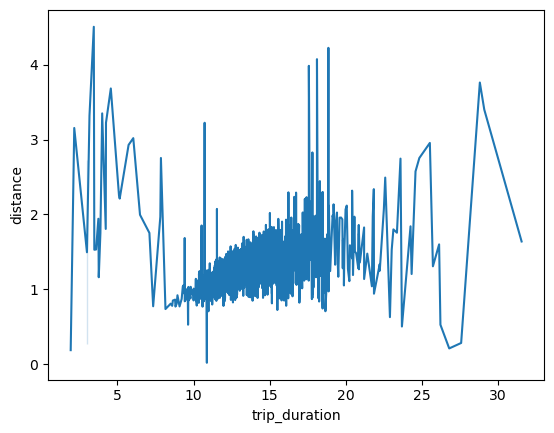

In [51]:
sns.lineplot(data=start, x="trip_duration", y="distance")

# Zillow data -- for the rent graph 

In [52]:
zillow = pd.read_csv('data/City_zori_uc_sfrcondomfr_sm_month.csv')

zillow

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2015-01-31,2015-02-28,...,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2624.596394,2640.217104,...,3361.341244,3375.513885,3399.864697,3434.932048,3480.418356,3526.520330,3558.415474,3568.503972,3564.960423,3541.318725
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,1897.539967,1912.108802,...,2839.665988,2844.534683,2852.597967,2866.983352,2868.765819,2872.543490,2876.058438,2883.509940,2885.218019,2878.630265
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,1218.908216,1223.512183,...,1557.430293,1565.986312,1574.607721,1578.550312,1585.846903,1595.020377,1601.967445,1600.307503,1597.991582,1593.873561
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,1494.964531,1504.848367,...,1916.632984,1930.835270,1948.508658,1965.898813,1991.996045,2015.084493,2026.901774,2030.609008,2020.469921,2003.920275
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,1005.875030,1010.219870,...,1452.734593,1455.361188,1462.768114,1463.359175,1467.760143,1465.530829,1466.054286,1465.141746,1461.987378,1454.004568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,124999,22469,Lake Hart,city,FL,FL,"Orlando-Kissimmee-Sanford, FL",Orange County,NaN,NaN,...,NaN,NaN,2390.943493,2339.642124,2367.732332,2410.258370,2414.498522,2376.391225,2309.267130,2296.396825
3141,47500,22678,Sagaponack,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Suffolk County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70166.500000
3142,30203,24266,Amagansett,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Suffolk County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71000.935067,66875.000000
3143,21129,26022,Wainscott,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Suffolk County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45000.000000


In [53]:
# new_york =  zillow.iloc[[0]]

new_york =  zillow.loc[zillow['RegionName'] == "New York"]

new_york

# medals = df.pivot_table('no of medals', ['Year', 'Country'], 'medal')
# sns.lineplot(data=zillow, x="region", y="passengers")

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2015-01-31,2015-02-28,...,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2624.596394,2640.217104,...,3361.341244,3375.513885,3399.864697,3434.932048,3480.418356,3526.52033,3558.415474,3568.503972,3564.960423,3541.318725


In [54]:
# new_york = new_york.pivot_table('RegionName', )
rents = new_york.transpose()

rents = rents.iloc[8:]

rents = rents.reset_index(names=['date'])



In [55]:
rents.head()

# rents.to_csv("data/rents.csv", sep='\t', encoding='utf-8')

,date,0
0,2015-01-31,2624.596394
1,2015-02-28,2640.217104
2,2015-03-31,2659.968744
3,2015-04-30,2686.611937
4,2015-05-31,2709.192721


<Axes: ylabel='0'>

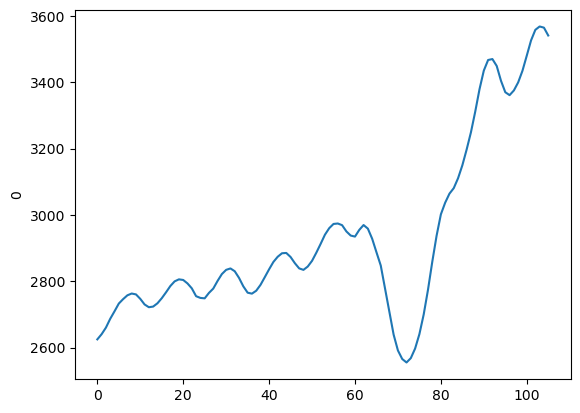

In [56]:
sns.lineplot(data=rents, x=rents.index, y=0)
# sns.lineplot(x=df.index, y='test', data=df)

# Census -- for the population denist graph

In [57]:
census = pd.read_csv('data/New_York_City_Population_By_Neighborhood_Tabulation_Areas_20231123.csv')

census

,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
0,Bronx,2000,5,BX01,Claremont-Bathgate,28149
1,Bronx,2000,5,BX03,Eastchester-Edenwald-Baychester,35422
2,Bronx,2000,5,BX05,Bedford Park-Fordham North,55329
3,Bronx,2000,5,BX06,Belmont,25967
4,Bronx,2000,5,BX07,Bronxdale,34309
...,...,...,...,...,...,...
385,Staten Island,2010,85,SI37,Stapleton-Rosebank,26453
386,Staten Island,2010,85,SI45,New Dorp-Midland Beach,21896
387,Staten Island,2010,85,SI48,Arden Heights,25238
388,Staten Island,2010,85,SI54,Great Kills,40720


In [58]:
# boroughs = census.groupby(['Borough', 'Year']).agg({'Population': 'sum'}).reset_index()

# boroughs.head(20)

population = [1446, 2648, 1638, 2330, 487]

sq_miles = [42, 71, 23, 71, 59]

boroughs = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

d = {'population': population, 'sq_miles': sq_miles, 'boroughs': boroughs}


census = pd.DataFrame(data=d)

census
# data taken from https://data.cityofnewyork.us/City-Government/New-York-City-Population-by-Borough-1950-2040/xywu-7bv9/data 


,population,sq_miles,boroughs
0,1446,42,Bronx
1,2648,71,Brooklyn
2,1638,23,Manhattan
3,2330,71,Queens
4,487,59,Staten Island


In [59]:
census['density'] = census['population']/ census['sq_miles']

census.to_csv("data/census.csv", sep='\t', encoding='utf-8')

census

,population,sq_miles,boroughs,density
0,1446,42,Bronx,34.428571
1,2648,71,Brooklyn,37.295775
2,1638,23,Manhattan,71.217391
3,2330,71,Queens,32.816901
4,487,59,Staten Island,8.254237


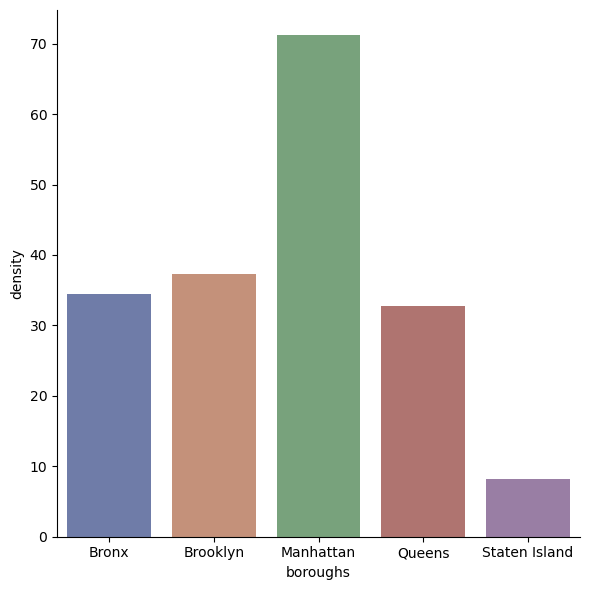

In [60]:
g = sns.catplot(
    data=census, kind="bar",
    x="boroughs", y="density",
    errorbar="sd", palette="dark", alpha=.6, height=6
)